# Regresión logística

**Inteligencia Artificial, 2026**

[**Ejecutar en Colab de Google**](https://colab.research.google.com/github/IA-UNISON/2-Aprendizaje-2026/blob/main/reg_logistica.ipynb)

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

## 1. Función logística, función de pérdida y gradiente de la función de costo

La función logística está dada por 

$$
\sigma(z) = \frac{1}{1 + e^{-z}},
$$

la cual es importante que podamos calcular en forma vectorial. Si bien el calculo es de una sola linea, el uso de estas funciones auxiliares facilitan la legibilidad del código.

#### Desarrolla la función logística, la cual se calcule para todos los elementos de un ndarray.

In [11]:
def logistica(z):
    """
    Calcula la función logística para cada elemento de z
    
    @param z: un ndarray
    @return: un ndarray de las mismas dimensiones que z
    """
    # Introduce código aqui (una linea de código)
    logistica = 1/(1 + np.exp(-z))
    
    return logistica
    
# prueba que efectivamente funciona la función implementada
# si el assert es falso regresa un error de aserción (el testunit de los pobres)
assert (np.abs(logistica(np.array([-1, 0, 1])) - np.array([ 0.26894142, 0.5, 0.73105858]))).sum() < 1e-6


Para probar la función vamos a graficar la función logística en el intervalo [-5, 5]

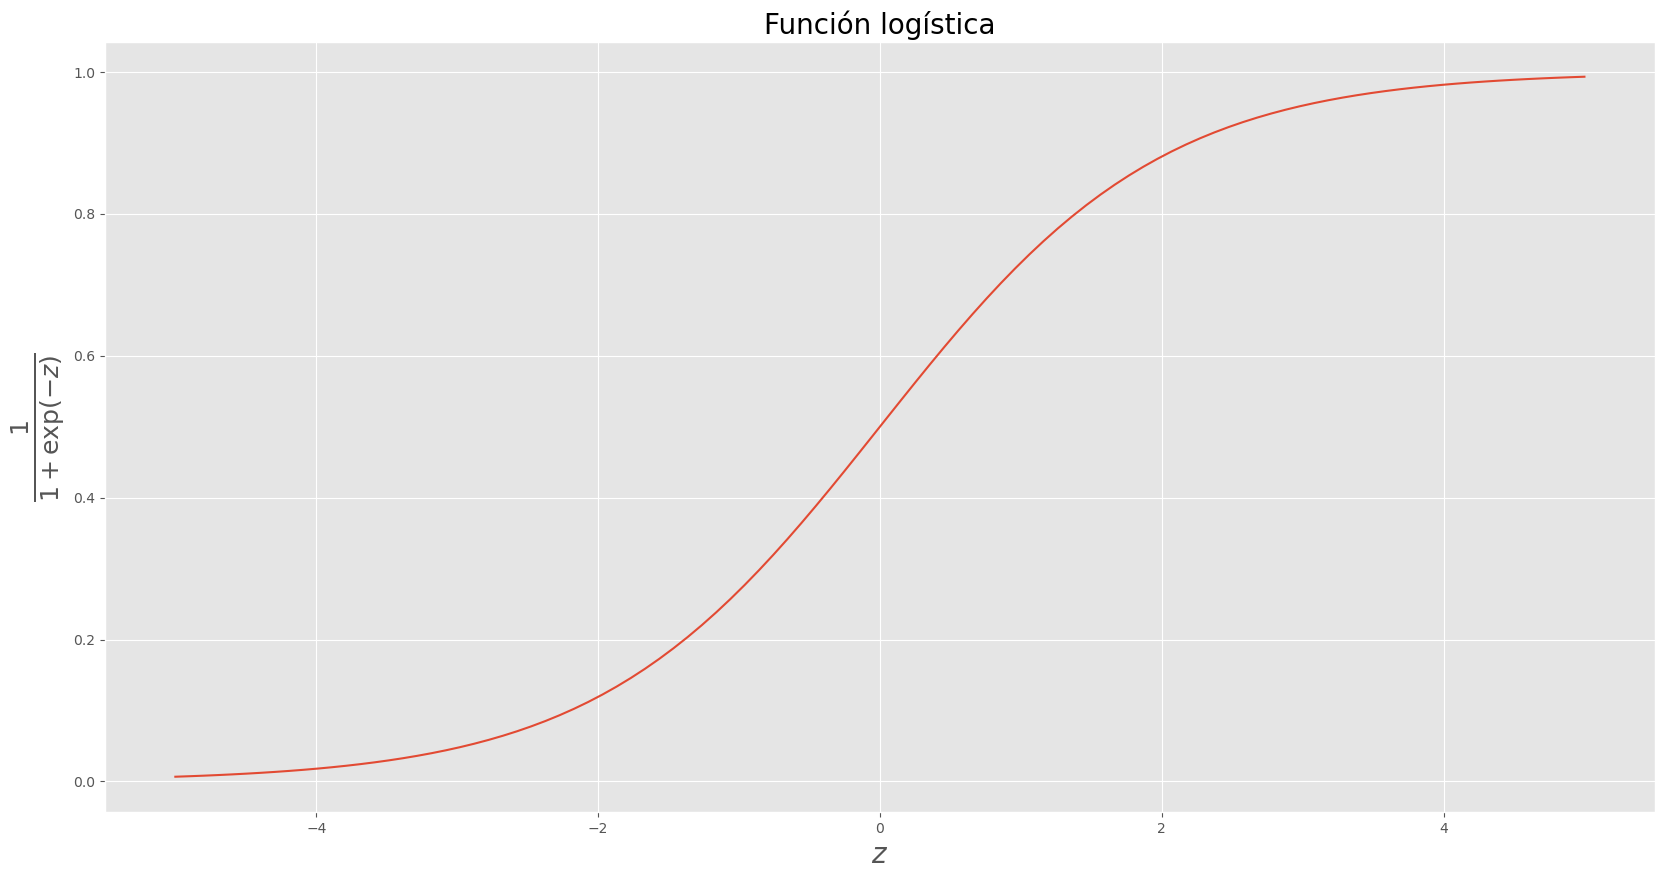

In [12]:
z = np.linspace(-5, 5, 100)

plt.plot( z, logistica(z))
plt.title(u'Función logística', fontsize=20)
plt.xlabel(r'$z$', fontsize=20)
plt.ylabel(r'$\frac{1}{1 + \exp(-z)}$', fontsize=26)
plt.show()


Una vez establecida la función logística, vamos a implementar la función de error en linea que se utiliza típicamente en clasificación binaria, la cual está dada por

$$
E_{in}(w, b) = -\frac{1}{M} \sum_{i=1}^M \left[ a^{(i)}\log(\hat{a}^{(i)}) + (1 - a^{(i)})\log(1 - \hat{a}^{(i)})\right],
$$

donde 

$$
\hat{a}^{(i)} = \sigma(z^{(i)}), \quad z^{(i)} = w^T x^{(i)} + b, \quad w \in \mathrm{R}^n, \quad b \in \mathrm{R}.
$$

Por supuesto estamos asumiendo que tenemos un conjunto de datos de aprendizaje $\{(x^{(1)}, y^{(1)}), \ldots, (x^{(M)}, y^{(M)})\}$ donde $x^{(i)} \in \mathrm{R}^n$ e $y^{(i)} \in \{-1,1\}$, y se puede calcular directamente $a^{(i)} = \max(0, y^{(i)})$ como se revisó en clase.

#### Implementa la función de error en muestra para un conjunto de aprendizaje.

In [13]:
def E_in(x, a, w, b):
    """
    Calcula E_in para el conjunto dee entrenamiento dado por y y x
    y los parametros w y b de la regresión logística
    
    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param a: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0
    @param w: un ndarray de dimensión (n, ) con los pesos
    @param b: un flotante con el sesgo

    @return: un flotante con el valor de pérdida
    
    """ 
    M = x.shape[0]

    # Agrega aqui tu código
    z = x @ w + b
    a_hat = logistica(z)
    error_en_muestra = (-1/M) * np.sum((a * np.log(a_hat)) + (1 - a) * np.log(1 - a_hat))
    
    return error_en_muestra
    

    
# Otra vez el testunit del pobre (ya lo calcule yo, pero puedes hacerlo a mano para estar seguro)
w = np.array([1])
b = 1.0

x = np.array([[10],
              [-5]])

y1 = np.array([1, 0])
y2 = np.array([0, 1])
y3 = np.array([0, 0])
y4 = np.array([1, 1])

assert abs(E_in(x, y1, w, b) - 0.01) < 1e-2
assert abs(E_in(x, y2, w, b) - 7.5) < 1e-2
assert abs(E_in(x, y3, w, b) - 5.5) < 1e-2
assert abs(E_in(x, y4, w, b) - 2.0) < 1e-2

De la misma manera, para poder implementar las funciones de aprendizaje, vamos a implementar el gradiente de la función de error. La derivada parcial del error en muestra respecto a cada variable es:

$$
\frac{\partial E_{in}(w, b)}{\partial w_j} = -\frac{1}{M} \sum_{i=1}^M \left(a^{(i)} - \hat{a}^{(i)}\right)x_j^{(i)} 
$$

$$
\frac{\partial E_{in}(w, b)}{\partial b} = -\frac{1}{M} \sum_{i=1}^M \left(a^{(i)} - \hat{a}^{(i)}\right) 
$$

y a partir de las ecuaciones individuales de puede obtener $\nabla E_{in}(\omega)$, la cual no la vamos a escribir en la libreta para que revisen en sus notas como se puede resolver este problema en forma matricial. 

#### Implementa (con operaciones matriciales) el calculo del gradiente de la función de pérdida.

In [14]:
def gradiente(x, a, w, b):
    """
    Calcula el gradiente de la función de error, 
    utilizando una neurona logística, para w y b y conociendo un conjunto de aprendizaje.
    
    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param a: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0
    @param w: un ndarray de dimensión (n, ) con los pesos
    @param b: un flotante con el sesgo
    
    @return: dw, db, un ndarray de mismas dimensiones que w y un flotnte con el cálculo de 
             la dervada evluada en el punto w y b
                 
    """
    M = x.shape[0]

    # Agregua aqui tu código
    z = x @ w + b
    a_hat = logistica(z)
    error = a_hat - a
    dw = (1/M) * np.dot(x.T,error)
    db = (1/M) * np.sum(error)
    
    return dw, db


    
# Otra vez el testunit del pobre (ya lo calcule yo, pero puedes hacerlo a mano para estar seguro)
w = np.array([1])
b = 1.0

x = np.array([[10],
              [-5]])

y1 = np.array([1, 0])
y2 = np.array([0, 1])
y3 = np.array([0, 0])
y4 = np.array([1, 1])

assert abs(0.00898475 - gradiente(x, y1, w, b)[1]) < 1e-4
assert abs(7.45495097 - gradiente(x, y2, w, b)[0]) < 1e-4 
assert abs(4.95495097 - gradiente(x, y3, w, b)[0]) < 1e-4 
assert abs(-0.49101525 - gradiente(x, y4, w, b)[1]) < 1e-4     

## 2. Descenso de gradiente

Ahora vamos a desarrollar las funciones necesarias para realizar el entrenamiento y encontrar la mejor $\omega$ de acuero a la función de costos y un conjunto de datos de aprendizaje.

Para este problema, vamos a utilizar una base de datos sintética proveniente del curso de [Andrew Ng](www.andrewng.org/) que se encuentra en [Coursera](https://www.coursera.org). Supongamos que pertenecemos al departamente de servicios escolares de la UNISON y vamos a modificar el procedimiento de admisión. En lugar de utilizar un solo exámen (EXCOBA) y la información del cardex de la preparatoria, hemos decidido aplicar dos exámenes, uno sicométrico y otro de habilidades estudiantiles. Dichos exámenes se han aplicado el último año aunque no fueron utilizados como criterio. Así, tenemos un historial entre estudiantes aceptados y resultados de los dos exámenes. El objetivo es hacer un método de regresión que nos permita hacer la admisión a la UNISON tomando en cuenta únicamente los dos exámenes y simplificar el proceso. *Recuerda que esto no es verdad, es solo un ejercicio*.

Bien, los datos se encuentran en el archivo `admision.txt` el cual se encuentra en formato `cvs` (osea los valores de las columnas separados por comas. Vamos a leer los datos y graficar la información para entender un poco los datos.

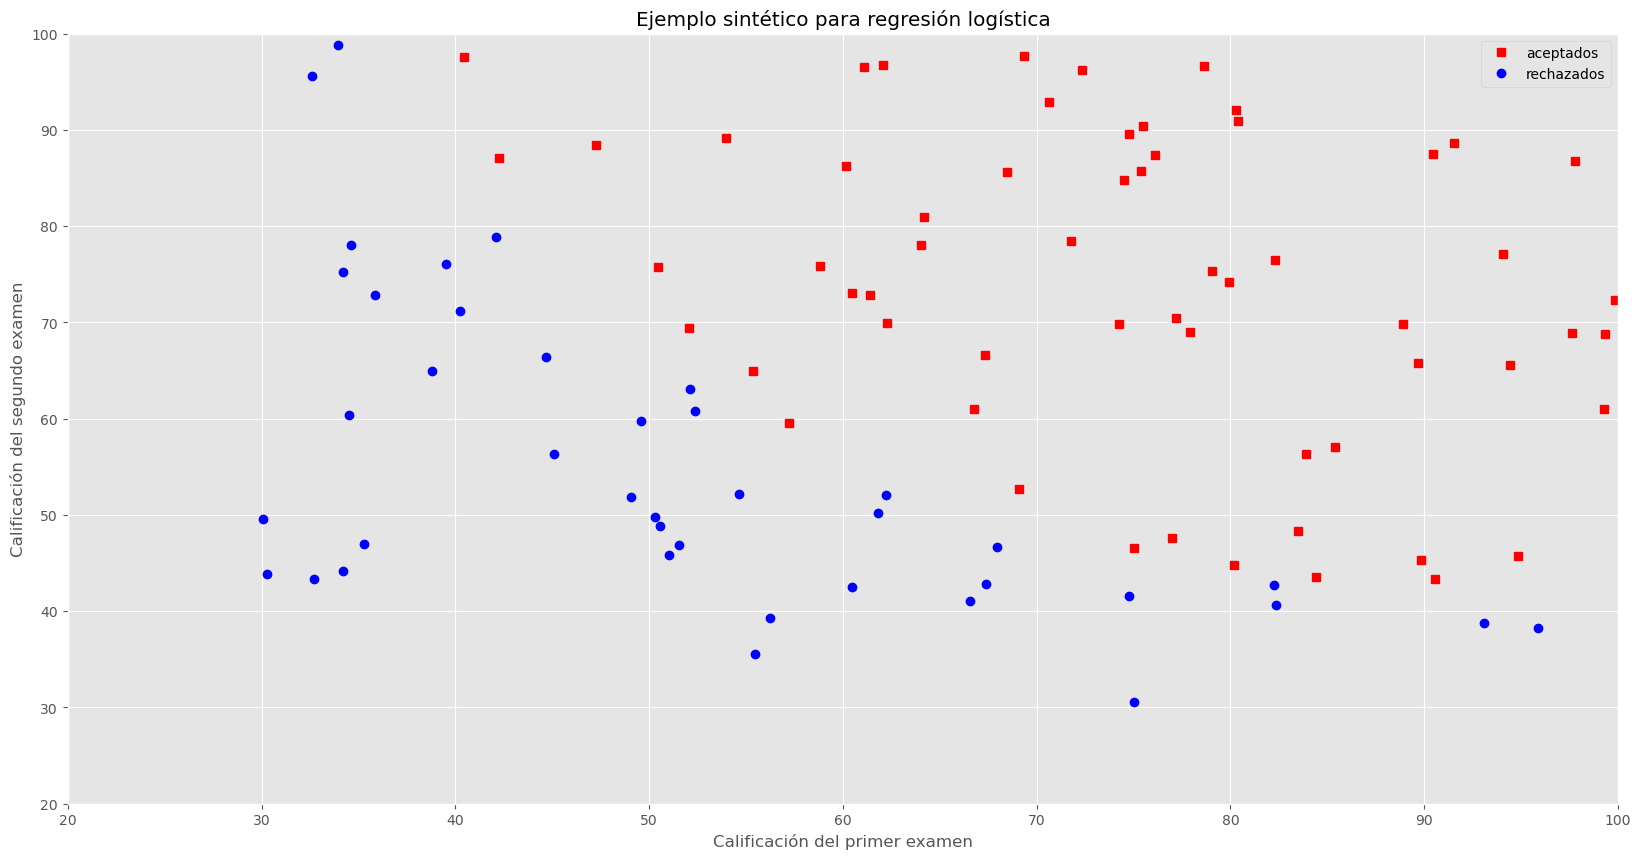

In [15]:
url = "https://github.com/IA-UNISON/2-Aprendizaje-2026/raw/main/datos/admision.txt"
datos = np.loadtxt(url, comments='%', delimiter=',')

x, y = datos[:,0:-1], datos[:,-1] 

plt.plot(x[y == 1, 0], x[y == 1, 1], 'sr', label='aceptados') 
plt.plot(x[y == 0, 0], x[y == 0, 1], 'ob', label='rechazados')
plt.title(u'Ejemplo sintético para regresión logística')
plt.xlabel(u'Calificación del primer examen')
plt.ylabel(u'Calificación del segundo examen')
plt.axis([20, 100, 20, 100])
plt.legend(loc=0)
plt.show()

Vistos los datos un clasificador lineal podría ser una buena solución. Ahora vamos a implementar el método de descenso de gradiente, casi de la misma manera que lo implementamos para regresión lineal (por lotes)

#### Implementa el descenso de gradiente para el problema de regresión logística en modo batch.

In [16]:
def descenso_rl_lotes(x, a, nu, max_iter=int(1e4), historial=False):
    """
    Descenso de gradiente por lotes para resolver el problema de regresión logística con un conjunto de aprendizaje

    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param a: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0
    @param nu: Un flotante (típicamente pequeño) con la tasa de aprendizaje
    @param max_iter: Máximo numero de iteraciones. Por default 1e4
    @param historial: Un booleano para saber si guardamos el historial del error o no
    
    @return: w, b, error_hist donde w es ndarray de dimensión (n, ) con los pesos; el flotante b  
             con el sesgo y error_hist, un ndarray de dimensión (max_iter,) con el error en muestra 
             en cada iteración. Si historial == False, entonces error_hist = None.
             
    """
    M, n = x.shape
    
    w = np.zeros(n)
    b = 0.0

    if historial:
        error_hist = np.zeros(max_iter)
        error_hist[0] = E_in(x,a,w,b)
    else:
        error_hist = None
        
    for epoch in range(1, max_iter):
        # Agregar aqui tu código
        # Recuerda utilizar las funciones que ya has desarrollado
        dw, db = gradiente(x,a,w,b)
        
        w = w - nu * dw
        b = b - nu * db
        
        if historial:
            error_hist[epoch] = E_in(x,a,w,b)
    return w, b, error_hist

Para probar la función de aprendizaje, vamos a aplicarla a nuestro problema de admisión. Primero recuerda que tienes que hacer una exploración para encontrar el mejor valor de $\epsilon$. Así que utiliza el código de abajo para ajustar $\alpha$.

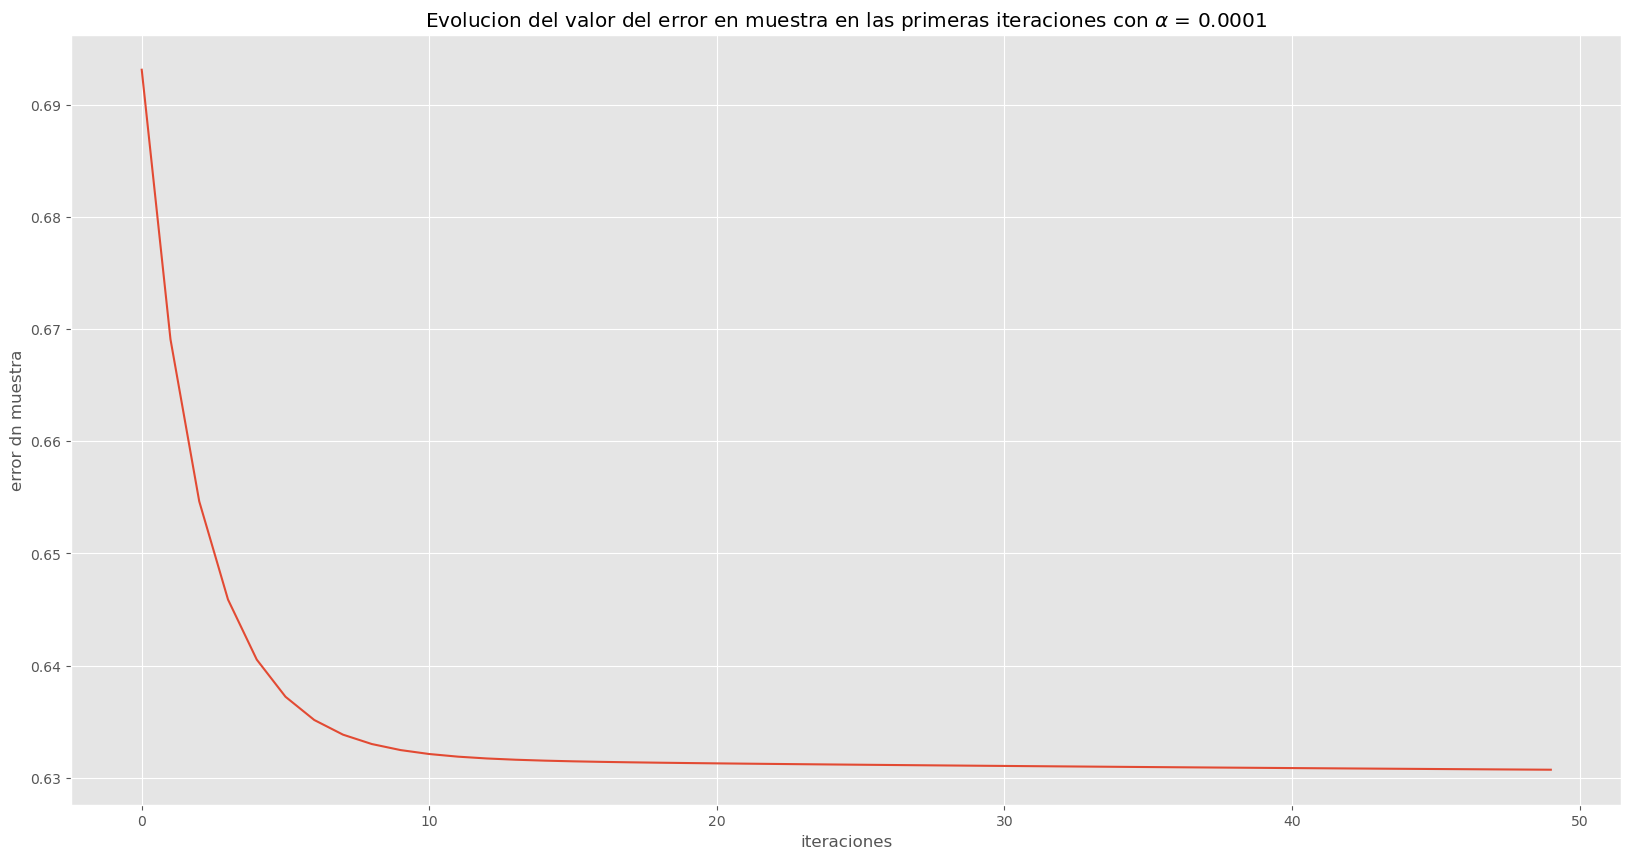

In [17]:
alpha = 1e-4
epochs = 50
_, _, error_hist = descenso_rl_lotes(x, y, alpha, max_iter=epochs, historial=True)

plt.plot(np.arange(epochs), error_hist)
plt.title(r'Evolucion del valor del error en muestra en las primeras iteraciones con $\alpha$ = ' + str(alpha))
plt.xlabel('iteraciones')
plt.ylabel('error dn muestra')
plt.show()

Una vez encontrado el mejor $\epsilon$, entonces podemos calcular $\omega$ y $b$ (esto va a tardar bastante), recuerda que el costo final debe de ser lo más cercano a 0 posible, así que agrega cuantas iteraciones sean necesarias (a partir de una función de pérdida con un valor de al rededor de 0.22 ya está bien): 

In [18]:
w, b, _ = descenso_rl_lotes(x, y, alpha, max_iter = 9000000)
print("Los pesos obtenidos son: \n{}".format(w))
print("El sesgo obtenido es: \n{}".format(b))
print("El valor final de la función de pérdida es: {}".format(E_in(x, y, w, b))) 

Los pesos obtenidos son: 
[0.12375064 0.11791482]
El sesgo obtenido es: 
-14.828856717794109
El valor final de la función de pérdida es: 0.2278644989478311


Es interesante ver como el descenso de gradiente no es muy eficiente en este tipo de problemas, a pesar de ser problemas de optimización convexos.

Bueno, este método nos devuelve $\omega$ y $b$, pero esto no es suficiente para decir que tenemos un clasificador, ya que un método de clasificación se compone de dos métodos, uno para **aprender** y otro para **predecir**. 

Recuerda que $\hat{a}^{(i)} = \Pr[y^{(i)} = 1 | x^{(i)} ; w, b]$, y a partir de esta probabilidad debemos tomar una desición. Igualmente recuerda que para tomar la desicion no necesitamos calcular el valor de la logística, si conocemos el umbral.

#### Desarrolla una función de predicción.

In [19]:
def predictor(x, w, b, umbral=0.5):
    """
    Predice los valores de y_hat (que solo pueden ser 0 o 1), utilizando el criterio MAP.
    
    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param w: un ndarray de dimensión (n, ) con los pesos
    @param b: un flotante con el sesgo
    @param umbral: un flotante en [0, 1] con el umbral, por default 0.5 (MAP)

    @return: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0 con la salida estimada
    """
    # Agrega aqui tu código sin utilizar la función logística
    umbral_z = np.log(umbral/(1 - umbral))
    z = x @ w + b
    y_est = (z >= umbral_z).astype(float)

    return y_est

¿Que tan bueno es este clasificador? ¿Es que implementamos bien el método?

Vamos a contestar esto por partes. Primero, vamos a graficar los mismos datos pero vamos a agregar la superficie de separación, la cual en este caso sabemos que es una linea recta. Como sabemos el criterio para decidir si un punto pertenece a la clase distinguida o no es si el valor de $w^T x^{(i)} + b \ge 0$, por lo que la frontera entre la región donde se escoge una clase de otra se encuentra en:

$$
0 = b + w_1 x_1  + w_2 x_2,
$$

y despejando:

$$
x_2 = -\frac{b}{w_2} -\frac{w_1}{w_2}x_1
$$

son los pares $(x_1, x_2)$ los valores en la forntera. Al ser estos (en este caso) una linea recta solo necesitamos dos para graficar la superficie de separación. 


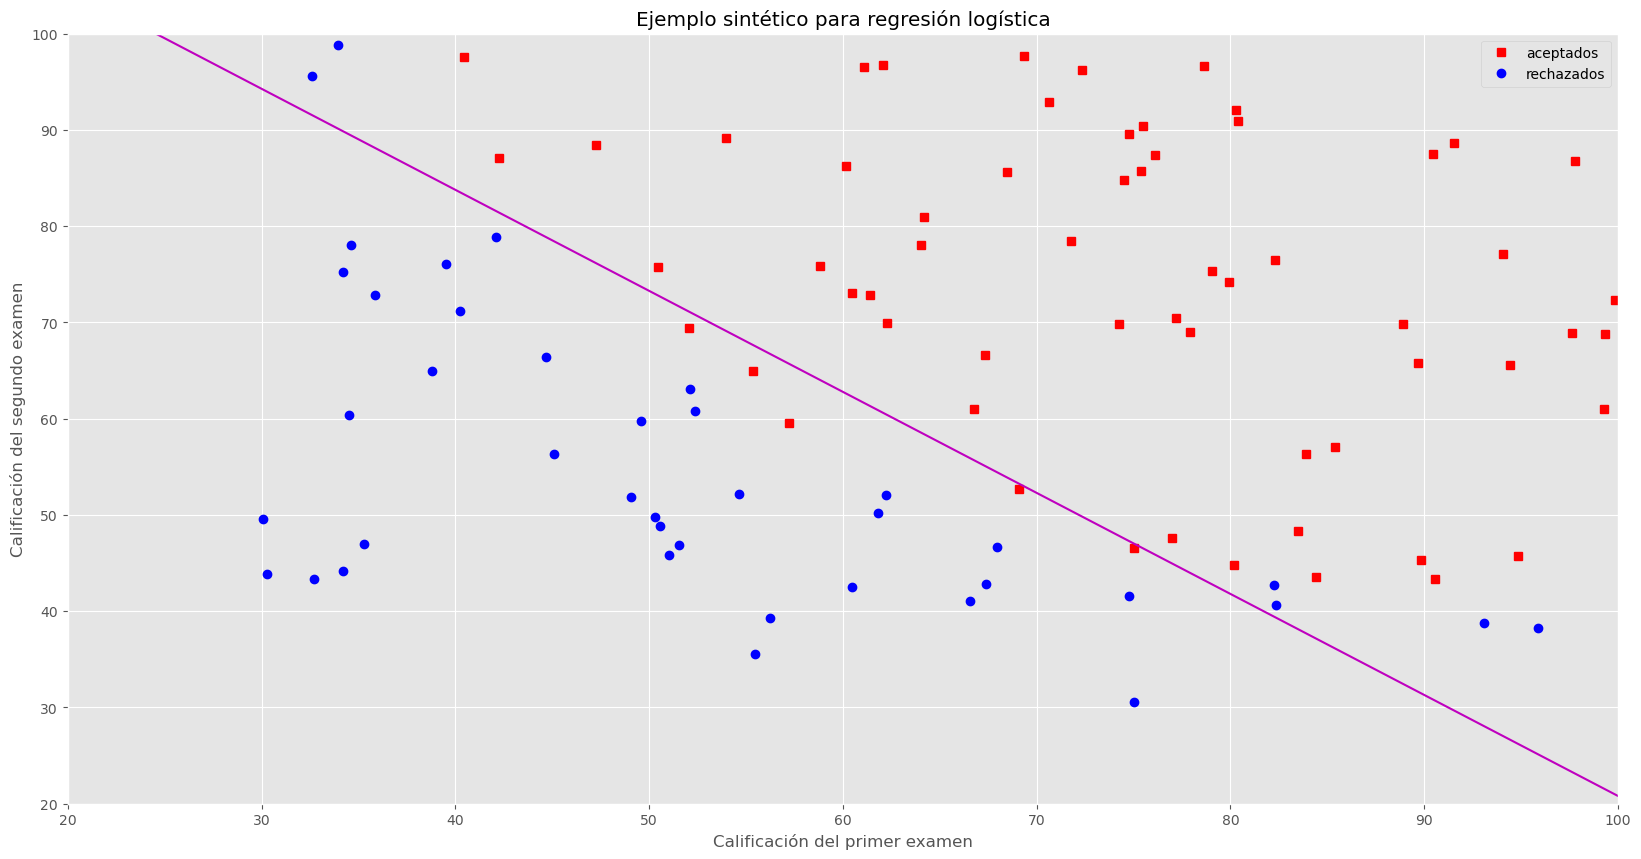

In [20]:
x1_frontera = np.array([20, 100]) #Los valores mínimo y máximo que tenemos en la gráfica de puntos
x2_frontera = -(b / w[1]) - (w[0] / w[1]) * x1_frontera

plt.plot(x[y == 1, 0], x[y == 1, 1], 'sr', label='aceptados') 
plt.plot(x[y == 0, 0], x[y == 0, 1], 'ob', label='rechazados')
plt.plot(x1_frontera, x2_frontera, '-m')
plt.title(u'Ejemplo sintético para regresión logística')
plt.xlabel(u'Calificación del primer examen')
plt.ylabel(u'Calificación del segundo examen')
plt.axis([20, 100, 20, 100])
plt.legend(loc=0)


Y para que tengas una idea de lo que debería de salir, anexo una figura obtenida con el código que yo hice 

![](https://raw.githubusercontent.com/mcd-unison/aaa-curso/main/ejemplos/ejemplo_logistica.png)

## 3. Clasificación polinomial

Como podemos ver en la gráfica de arriba, parece ser que la regresión logística aceptaría a algunos estudiantes rechazados y rechazaría a algunos que si fueron en realidad aceptados. En todo método de clasificación hay un grado de error, y eso es parte del poder de generalización de los métodos. 

Sin embargo, una simple inspección visual muestra que, posiblemente, la regresión lineal no es la mejor solución, ya que la frontera entre las dos clases parece ser más bien una curva.

¿Que tal si probamos con un clasificador cuadrático? Un clasificador cuadrático no es más que la regresión lineal pero a la que se le agregan todos los atributos que sean una combinación de dos de los atributos. 

Por ejemplo, si un ejemplo $x = (x_1, x_2, x_3)^T$ se aumenta con todas sus componentes cuadráticas, entonces tenemos los atributos

$$
\phi_2(x) = (x_1, x_2, x_3, x_1 x_2, x_1 x_3, x_2 x_3, x_1^2, x_2^2, x_3^2)^T.
$$ 

De la misma manera se pueden obtener clasificadores de orden tres, cuatro, cinco, etc. En general a estos clasificadores se les conoce como **clasificadores polinomiales**. Ahora, para entender bien la idea, vamos a resolver el problema anterior con un clasificador de orden 2. 

Sin embargo, si luego se quiere hacer el reconocimiento de otros objetos, o cambiar el orden del polinomio, pues se requeriría de reclcular cada vez la expansión polinomial. Vamos a generalizar la obtención de atributos polinomiales con la función `map_poly`, la cual la vamos a desarrollar a continuación.

En este caso, la normalización de los datos es muy importante, por lo que se agregan las funciones pertinentes.


In [21]:
from itertools import combinations_with_replacement

def map_poly(grad, x):
    """
    Encuentra las características polinomiales hasta el grado grad de la matriz de datos x, 
    asumiendo que x[:n, 0] es la expansión de orden 1 (los valores de cada atributo)
    
    @param grad: un entero positivo con el grado de expansión
    @param x: un ndarray de dimension (M, n) donde n es el número de atributos
    
    @return: un ndarray de dimensión (M, n_phi) donde
             n_phi = \sum_{i = 1}^grad fact(i + n - 1)/(fact(i) * fact(n - 1))
    """
    
    if int(grad) < 2:
        raise ValueError('grad debe de ser mayor a 1')
    
    M, n = x.shape
    atrib = x.copy()
    x_phi = x.copy()
    for i in range(2, int(grad) + 1):
        for comb in combinations_with_replacement(range(n), i):
            x_phi = np.c_[x_phi, np.prod(atrib[:, comb], axis=1)]
    return x_phi   

def medias_std(x):
    """
    Obtiene un vector de medias y desviaciones estandar para normalizar
    
    @param x: Un ndarray de (M, n) con una matriz de diseño
    
    @return: mu, des_std dos ndarray de dimensiones (n, ) con las medias y desviaciones estandar
    
    """
    return np.mean(x, axis=0), np.std(x, axis=0)

def normaliza(x, mu, des_std):
    """
    Normaliza los datos x
    
    @param x: un ndarray de dimension (M, n) con la matriz de diseño
    @param mu: un ndarray (n, ) con las medias
    @param des_std: un ndarray (n, ) con las desviaciones estandard
    
    @return: un ndarray (M, n) con x normalizado
    
    """
    return (x - mu) / des_std


**Realiza la clasificación de los datos utilizando un clasificador cuadrático (recuerda ajustar primero el valor de $\alpha$)**

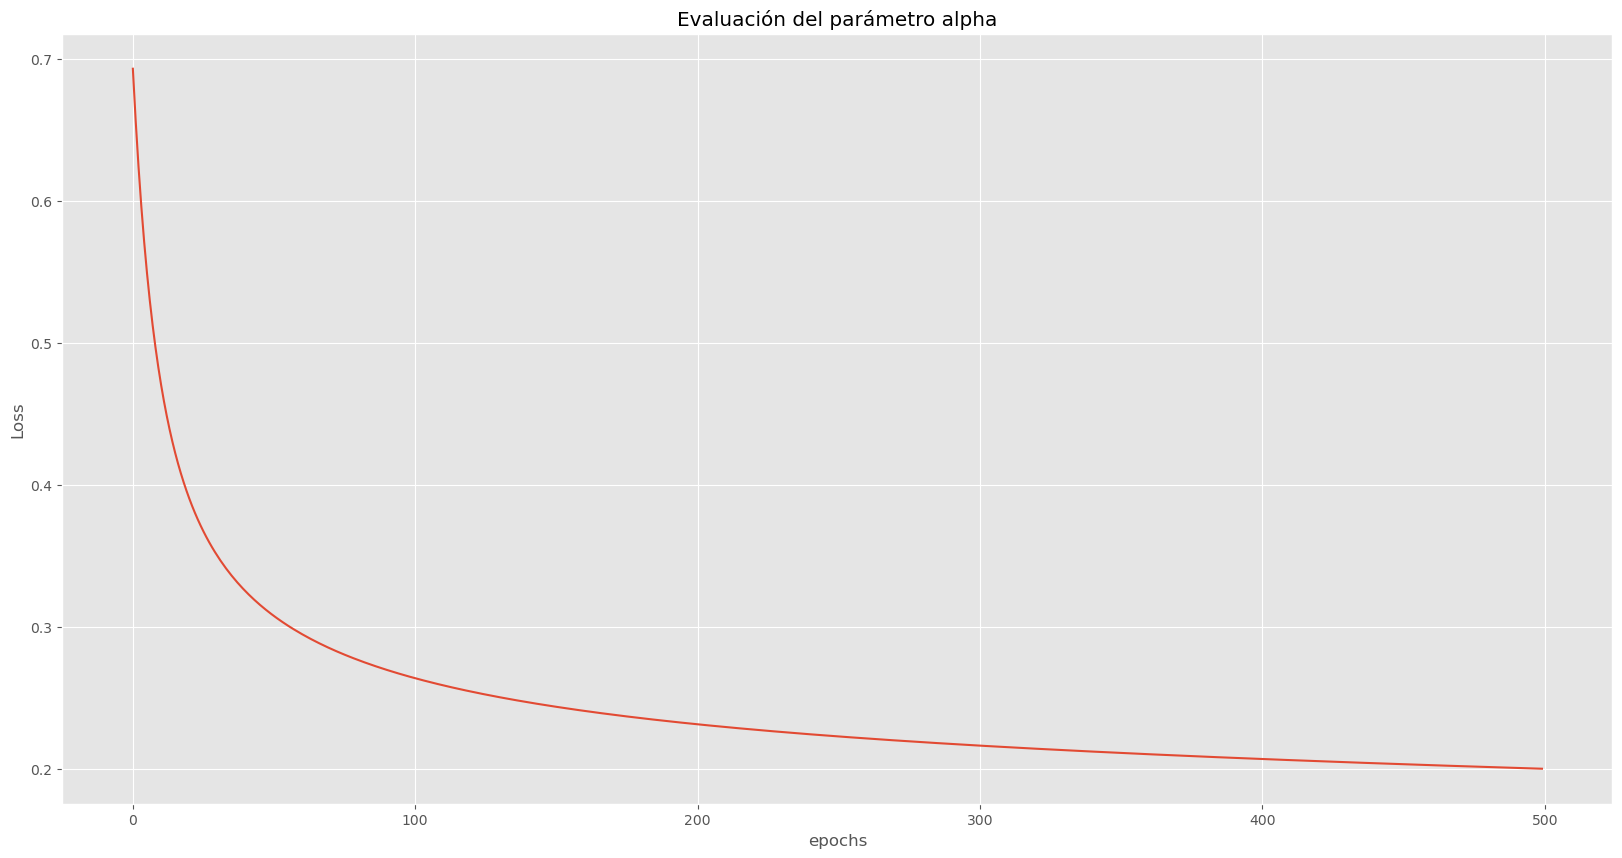

In [22]:
# Encuentra phi_x (x son la expansión polinomial de segundo orden, utiliza la función map_poly

#--Agrega el código aqui--
phi_x =  map_poly(2, x)
mu, de = medias_std(phi_x)
phi_x_norm = normaliza(phi_x, mu, de)

# Utiliza la regresión logística
alpha = 0.09
max_iter = 500

_, _, hist_loss = descenso_rl_lotes(phi_x_norm, y, alpha, max_iter, historial=True)

plt.plot(range(len(hist_loss)), hist_loss)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Evaluación del parámetro alpha')
plt.show()

In [23]:
w_norm, b_norm, _ = descenso_rl_lotes(phi_x_norm, y, alpha, 23123)

print("Los pesos obtenidos son: \n{}".format(w_norm))
print("El sesgo obtenidos es: \n{}".format(b_norm))
print("El valor final de la función de pérdida es: {}".format(E_in(phi_x_norm, y, w_norm, b_norm))) 

Los pesos obtenidos son: 
[ 4.35350641  3.35643142 -4.38317019 13.30855157 -3.01410502]
El sesgo obtenidos es: 
6.43679958204392
El valor final de la función de pérdida es: nan


/tmp/ipykernel_3492/3330561233.py:19: RuntimeWarning: divide by zero encountered in log
  error_en_muestra = (-1/M) * np.sum((a * np.log(a_hat)) + (1 - a) * np.log(1 - a_hat))
/tmp/ipykernel_3492/3330561233.py:19: RuntimeWarning: invalid value encountered in multiply
  error_en_muestra = (-1/M) * np.sum((a * np.log(a_hat)) + (1 - a) * np.log(1 - a_hat))


donde se puede encontrar un valor de pérdida de aproximadamente 0.03.

Esto lo tenemos que graficar. Pero graficar la separación de datos en una proyección en las primeras dos dimensiones, no es tan sencillo como lo hicimos con una separación lineal, así que vamos a tener que generar un `contour`, y sobre este graficar los datos. Para esto vamos a desarrollar una función.

In [24]:
def plot_separacion2D(x, y, grado, mu, de, w, b):
    """
    Grafica las primeras dos dimensiones (posiciones 1 y 2) de datos en dos dimensiones 
    extendidos con un clasificador polinomial así como la separación dada por theta_phi
    
    """
    if grado < 2:
        raise ValueError('Esta funcion es para graficar separaciones con polinomios mayores a 1')
    
    x1_min, x1_max = np.min(x[:,0]), np.max(x[:,0])
    x2_min, x2_max = np.min(x[:,1]), np.max(x[:,1])
    delta1, delta2 = (x1_max - x1_min) * 0.1, (x2_max - x2_min) * 0.1

    spanX1 = np.linspace(x1_min - delta1, x1_max + delta1, 600)
    spanX2 = np.linspace(x2_min - delta2, x2_max + delta2, 600)
    X1, X2 = np.meshgrid(spanX1, spanX2)
    
    X = normaliza(map_poly(grado, np.c_[X1.ravel(), X2.ravel()]), mu, de)
        
    Z = predictor(X, w, b)
    Z = Z.reshape(X1.shape[0], X1.shape[1])
    
    # plt.contour(X1, X2, Z, linewidths=0.2, colors='k')
    plt.contourf(X1, X2, Z, 1, cmap=plt.cm.binary_r)
    plt.plot(x[y > 0.5, 0], x[y > 0.5, 1], 'sr', label='clase positiva')
    plt.plot(x[y < 0.5, 0], x[y < 0.5, 1], 'oy', label='clase negativa')
    plt.axis([spanX1[0], spanX1[-1], spanX2[0], spanX2[-1]])
    plt.show()

Y ahora vamos a probar la función `plot_separacion2D` con los datos de entrenamiento. El comando tarda, ya que estamos haciendo un grid de 200 $\times$ 200, y realizando evaluaciones individuales.

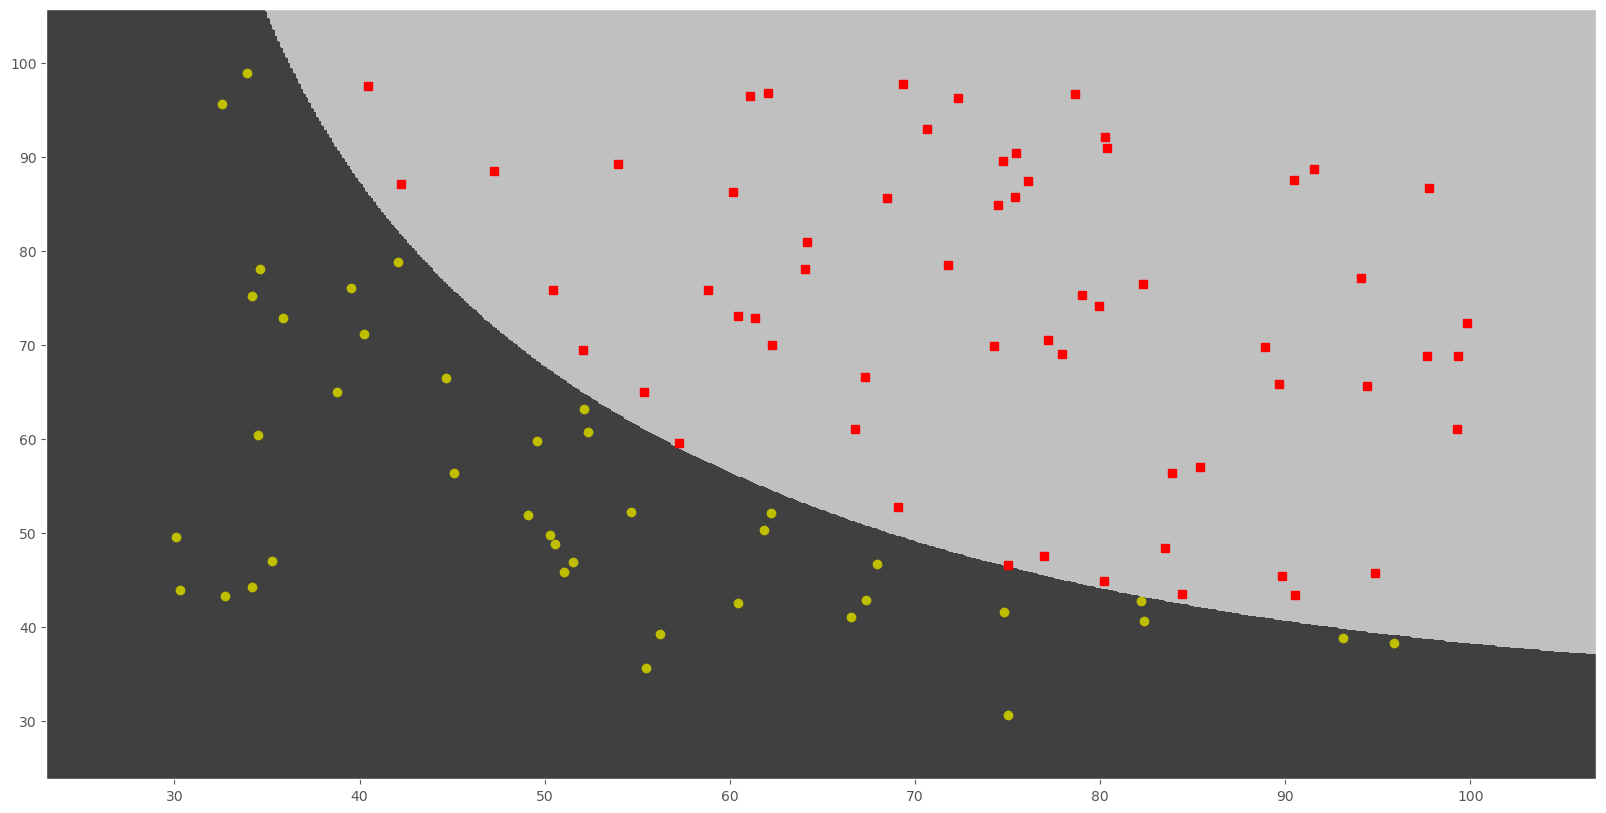

Text(0, 0.5, 'Calificación del segundo examen')

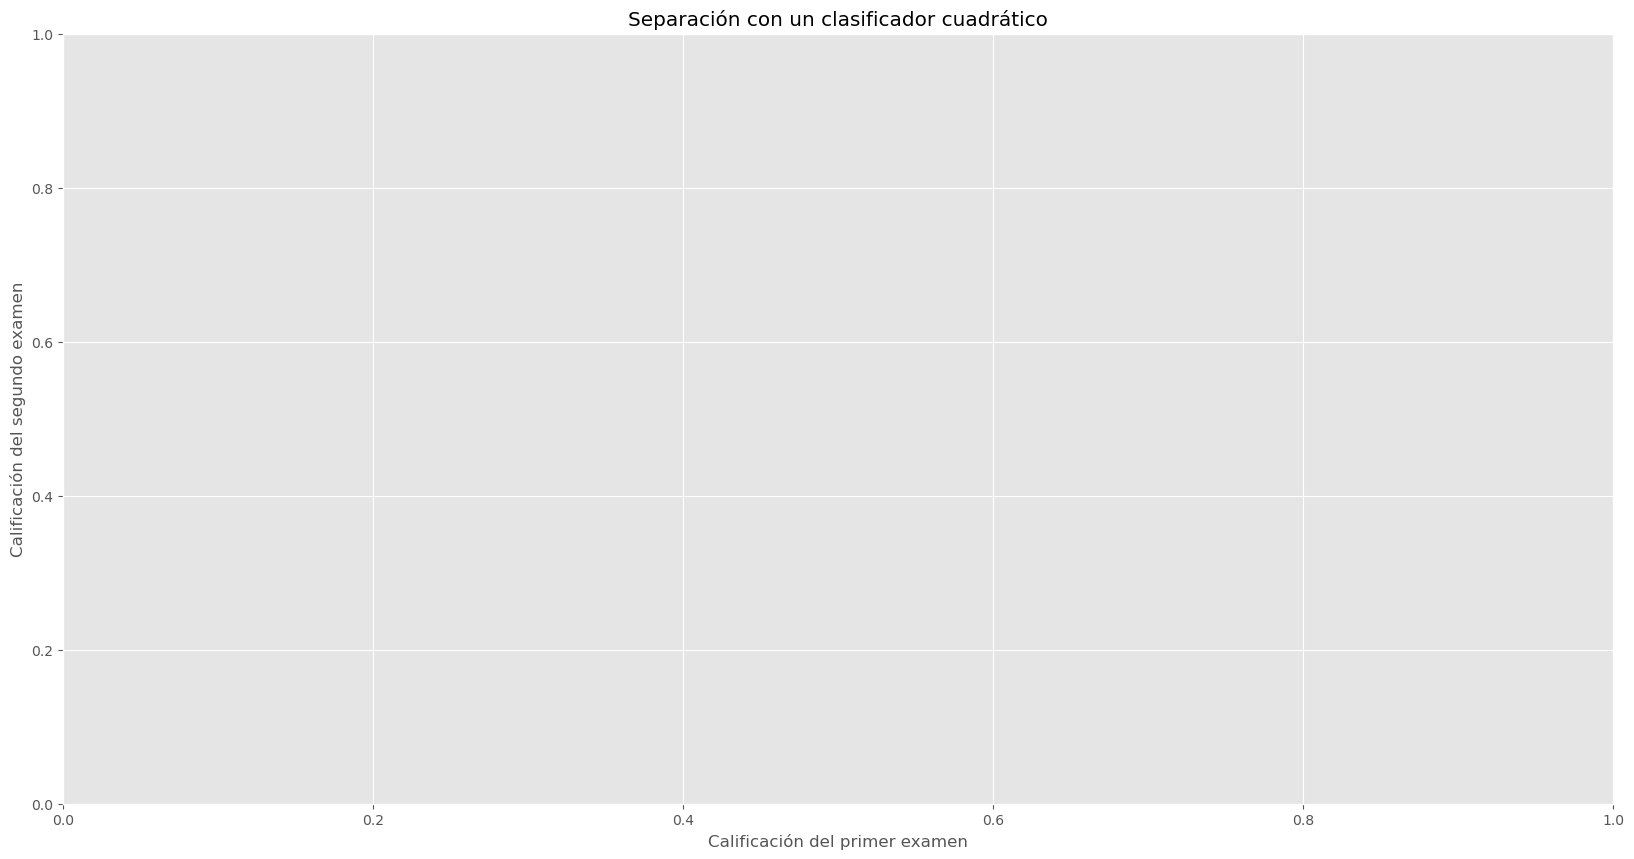

In [25]:
plot_separacion2D(x, y, 2, mu, de, w_norm, b_norm)
plt.title(u"Separación con un clasificador cuadrático")
plt.xlabel(u"Calificación del primer examen")
plt.ylabel(u"Calificación del segundo examen")

Y para dar una idea de lo que debería de salir, anexo una figura tal como me salió a mi.

![](https://raw.githubusercontent.com/mcd-unison/aaa-curso/main/ejemplos/ejemplo_cuad.png)

Como podemos ver, un clasificador polinomial de orden 2 clasifica mejor los datos de aprendizaje, y además parece suficientemente simple para ser la mejor opción para hacer la predicción. Claro, esto lo sabemos porque pudimos visualizar los datos, y en el fondo estamos haciendo trampa al seleccionar la expansión polinomial a partir de una inspección visual de los datos.